In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Kodning av egen Kmeans

In [2]:
def distance(x,y):
    return np.linalg.norm(x-y)

class Kmeans:
    def __init__(self, k=5, max_iter=100):
        self.k = k
        self.max_iter = max_iter
        self.final_centroids = []
        
        
    def fit(self, X):
        self.X_train = X
        self.n_samples = X.shape[0]
        
        random_sample_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        cluster_centers = [X.iloc[idx] for idx in random_sample_idxs]


        cluster_centers = np.array(cluster_centers)
        
        for _ in range(self.max_iter):
            cluster_idx = []
            for row in X.index:
                distance_list = [distance(X.iloc[row], point) for point in cluster_centers]
                closest_cluster_idx = np.argmin(distance_list)
                cluster_idx.append(closest_cluster_idx)
                
            clusters_df = X.copy()
            clusters_df['cluster'] = cluster_idx

            new_centroids = []
            for x in range(self.k):
                mean_values = np.mean(clusters_df.loc[clusters_df['cluster'] == x], axis=0)
                mean_values = mean_values.drop('cluster', axis=0)
                centroid = []
                for value in mean_values:
                    centroid.append(value)
                new_centroids.append(centroid)
            
            cluster_centers = new_centroids
        cluster_centers = np.array(cluster_centers)
        self.final_centroids = cluster_centers
        return cluster_centers

    def predict(self, X):
        cluster_idx = []
        for row in X.index:
            distance_list = [distance(X.iloc[row], point) for point in self.final_centroids]
            closest_cluster_idx = np.argmin(distance_list)
            cluster_idx.append(closest_cluster_idx)
        return cluster_idx

In [3]:
def pca_transformation(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])
    return principal_df

# Dataset 1 - Small Iris

In [4]:
small_iris = pd.read_csv("small_iris.csv")
small_iris.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'petal length (cm)'}>]], dtype=object)

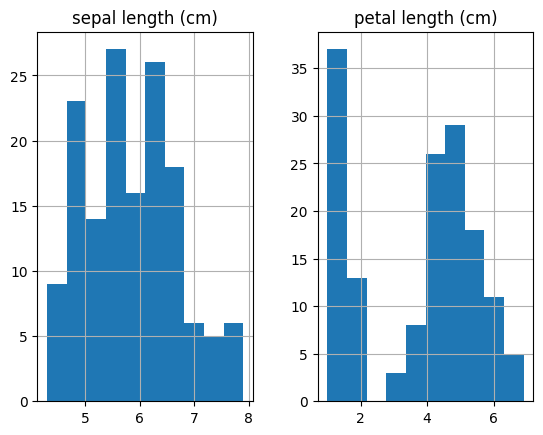

In [5]:
small_iris.hist()

In [6]:
small_iris.isnull().sum()

sepal length (cm)    0
petal length (cm)    0
dtype: int64

Datan för small iris innehåller inga konstiga värden eller nullvärden. Den har inga värden som sticker ut som behöver tas bort. Det är ett litet dataset på bara 150 datapunkter och 2 attributer.

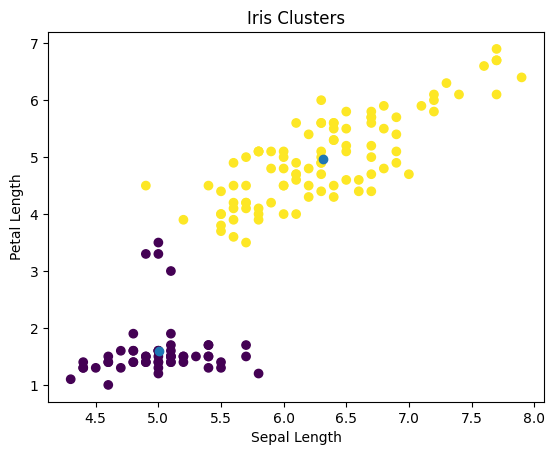

In [7]:
kmeans = Kmeans(k=2, max_iter=22)
cluster_centers = kmeans.fit(small_iris) # I våran kmeans returnerar .fit en array på cluster centers
small_iris['iris_cluster'] = kmeans.predict(small_iris) # Predict returnerar en lista med labels för
                                                            # varje datapunkt baserat på deras närmaste centroid
plt.scatter(small_iris['sepal length (cm)'], small_iris['petal length (cm)'], c=small_iris['iris_cluster'])
plt.scatter(cluster_centers[:,0], cluster_centers[:,1])
plt.title("Iris Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

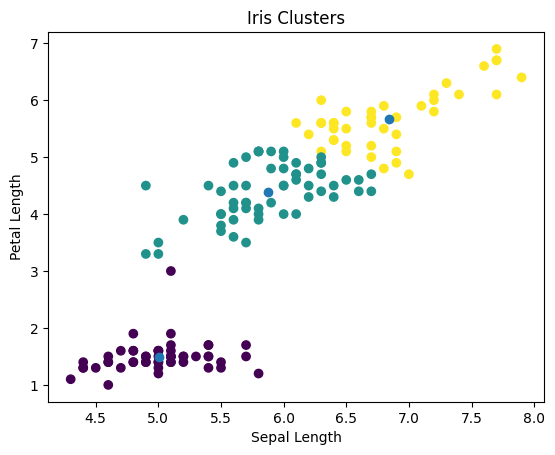

In [8]:
kmeans = Kmeans(k=3, max_iter=22)
cluster_centers = kmeans.fit(small_iris)
small_iris['iris_cluster'] = kmeans.predict(small_iris)
                                                            
plt.scatter(small_iris['sepal length (cm)'], small_iris['petal length (cm)'], c=small_iris['iris_cluster'])
plt.scatter(cluster_centers[:,0], cluster_centers[:,1])
plt.title("Iris Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

För small iris dataset ger oss våran kmeans modell i princip samma om inte exakt samma cluster som sklearns modell. Våran modell är dock inte lika snabb. Jag har även upptäckt att när vi kör k=3 blir resultat oftast bra men inte alltid. Ibland clustrar han nedre klustern till 2 små och den över klustern till en gigantisk. Det kan bero på otur med vart de första slumpmässiga centroids har hamnat.

# Dataset 2 - Iris

In [9]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
iris.shape

(150, 4)

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

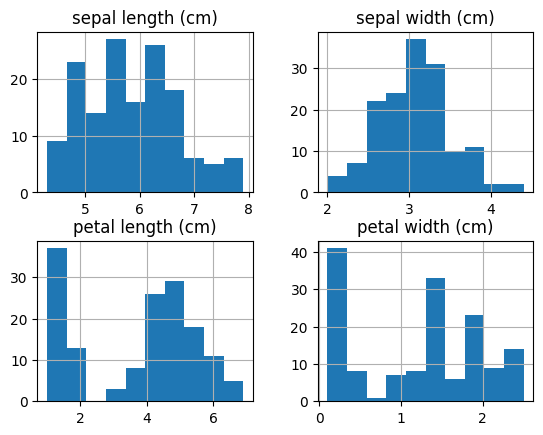

In [11]:
iris.hist()

In [12]:
small_iris.isnull().sum()

sepal length (cm)    0
petal length (cm)    0
iris_cluster         0
dtype: int64

Lika stor och lika bra dataset som small iris bara med 4 istället för 2 attributer. Redo att köras!

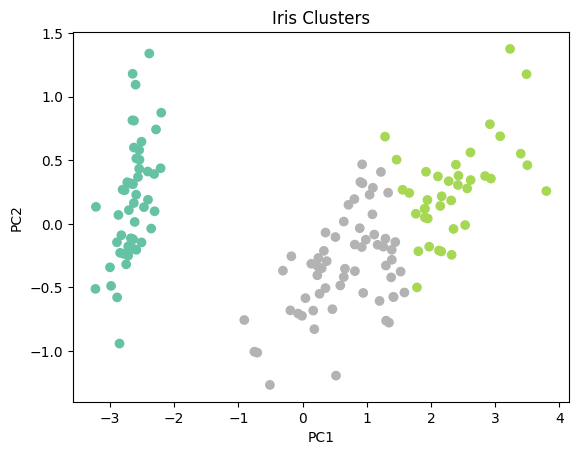

In [13]:
kmeans = Kmeans(k=3)
cluster_centers = kmeans.fit(iris)
small_iris_pca = pca_transformation(iris)
small_iris_pca['iris_cluster'] = kmeans.predict(iris)
                                                           
plt.scatter(small_iris_pca['principal component 1'], small_iris_pca['principal component 2'], c=small_iris_pca['iris_cluster'], cmap=plt.cm.Set2)
plt.title("Iris Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Här får vi fina tre kluster med i princip ingen variation från körning till körning. Klustren är identiska till resultatet i sista delen av sista inlämning av förra kurs.

# Dataset 3 - Mall Customers

In [14]:
mall_customers = pd.read_csv("Mall_Customers.csv")
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Detta dataset innehåller sträng värde som bör konverteras till siffra eller bool eftersom det verkar finnas bara 2 olika unika värden. Vi har även customer id som är aldrig lämplig attribut.

In [15]:
mall_customers.shape

(200, 5)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

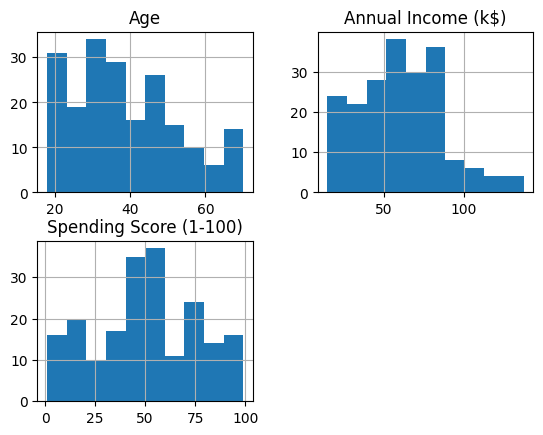

In [16]:
mall_customers.hist(column=['Age','Annual Income (k$)','Spending Score (1-100)'])

In [17]:
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
print(mall_customers[mall_customers.duplicated()])

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


Alla värden har rimlig storlek mellan 0-100 med income som har några lite högre värden men inga som sticker långt ut. Slutligen kommer vi bara ta bort ID column samt gender och testa klustringen.

In [19]:
mall_customers = mall_customers.drop(columns=['Gender', 'CustomerID'])

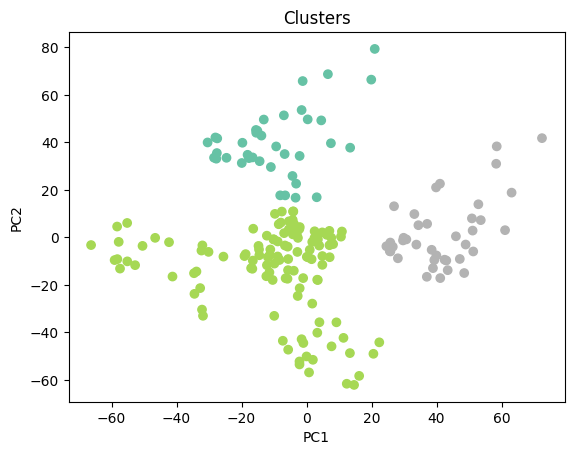

In [20]:
kmeans = Kmeans(k=3)
cluster_centers = kmeans.fit(mall_customers)
mall_pca = pca_transformation(mall_customers)
mall_pca['cluster'] = kmeans.predict(mall_customers)
                                                           
plt.scatter(mall_pca['principal component 1'], mall_pca['principal component 2'], c=mall_pca['cluster'], cmap=plt.cm.Set2)
plt.title("Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

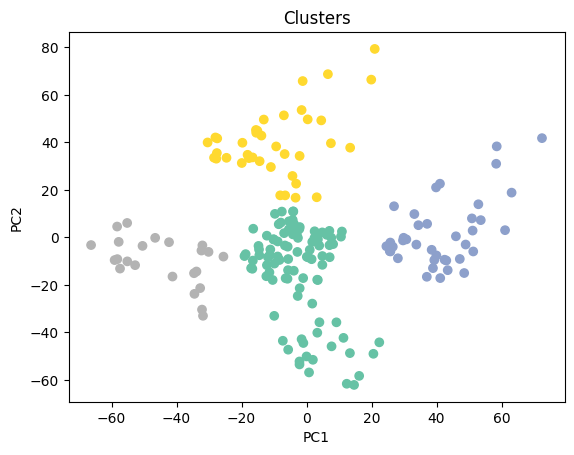

In [21]:
kmeans = Kmeans(k=4)
cluster_centers = kmeans.fit(mall_customers)
mall_pca = pca_transformation(mall_customers)
mall_pca['cluster'] = kmeans.predict(mall_customers)
                                                           
plt.scatter(mall_pca['principal component 1'], mall_pca['principal component 2'], c=mall_pca['cluster'], cmap=plt.cm.Set2)
plt.title("Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

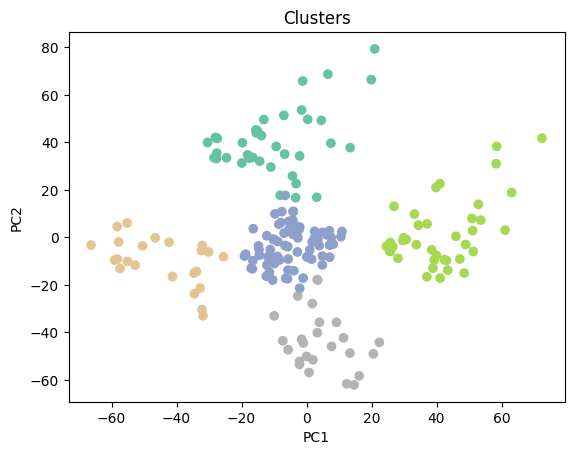

In [22]:
kmeans = Kmeans(k=5)
cluster_centers = kmeans.fit(mall_customers)
mall_pca = pca_transformation(mall_customers)
mall_pca['cluster'] = kmeans.predict(mall_customers)
                                                           
plt.scatter(mall_pca['principal component 1'], mall_pca['principal component 2'], c=mall_pca['cluster'], cmap=plt.cm.Set2)
plt.title("Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Här kan vi visuellt se att datan ser ut lite som en fläkt. Av alla k-värden jag har testat verkar 4 eller 5 mest intressant därav jag inkluderade bara dem. Datan har tydliga 4 kluster, en för varje fläktblad. Frågan är om centrumet ska få vara sin egen kluster eller tillhöra delvis fläktbladen. Våran modell verkar rent visuellt klustra datan på ett rimligt sätt och med marginell variation mellan körningarna.

# Extra test

Sklearns KMeans har två initieringsmetoder nämligen kmeans++ och random. Per default är den satt till kmeans++ som innebär att initiala centroids är inte random. Kan detta vara orsaken till att min modell har mer variation mellan körningarna än deras?

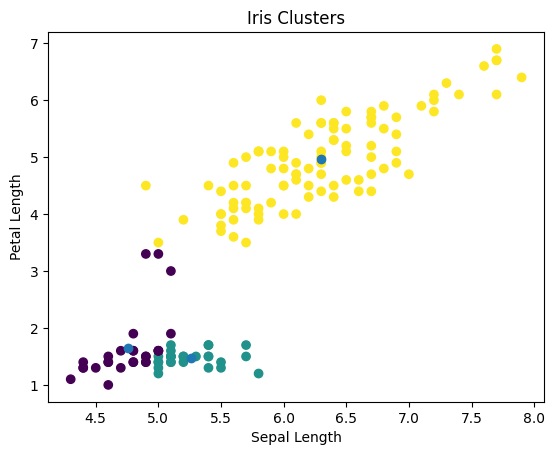

In [23]:
from sklearn.cluster import KMeans
sklearn_kmeans = KMeans(n_clusters=3, max_iter=22, init='random', n_init=1)
sklearn_kmeans.fit(small_iris)
small_iris['iris_cluster'] = sklearn_kmeans.predict(small_iris)
                                                            
plt.scatter(small_iris['sepal length (cm)'], small_iris['petal length (cm)'], c=small_iris['iris_cluster'])
plt.scatter(sklearn_kmeans.cluster_centers_[:,0], sklearn_kmeans.cluster_centers_[:,1])
plt.title("Iris Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

Det verkar stämma! Kör vi om sklearns kmeans flera gånger med random och n_init=1 får vi ibland den andra variationen på klustren precis som våran modell ibland gör.

# Extra 2 jämföra Mall Customers med sklearns modell

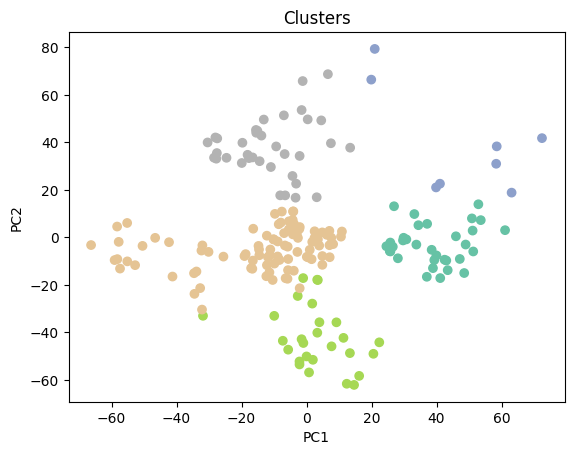

In [24]:
sklearn_kmeans = KMeans(n_clusters=5, max_iter=22, init='random', n_init=1)
sklearn_kmeans.fit(mall_customers)
mall_pca = pca_transformation(mall_customers)
mall_pca['cluster'] = sklearn_kmeans.predict(mall_customers)
                                                           
plt.scatter(mall_pca['principal component 1'], mall_pca['principal component 2'], c=mall_pca['cluster'], cmap=plt.cm.Set2)
plt.title("Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

För att spegla våran modell har vi initierat sklearns modell helt random och fått samma kluster och exakt samma variation när vi kör om koden flera gånger.